In [1]:
import json
from tqdm import tqdm
from pathlib import Path
import sys
import csv
import os
from collections import defaultdict, Counter
import ast
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib


In [28]:
with open('../datasets/personality_captions/val.json') as f:
    gt = {x['image_hash'] : x for x in json.load(f)}

with open('../experiments/sequence/pred.personality_captions.val.beam5.max20.odlabels_coco_format.json') as f:
    sequence = json.load(f)
    
with open('../experiments/inject/checkpoint-12-9000/pred.personality_captions.val.beam5.max20.odlabels_coco_format.json') as f:
    inject = json.load(f)

In [47]:
def difference(i):
    image_id, seq_caption = sequence[i].values()
    _, inj_caption = inject[i].values()
    
    actual_caption = gt[image_id]['comment']
    personality = gt[image_id]['personality']
    
    img = mpimg.imread(f'../datasets/yfcc_images/{image_id}.jpg')
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    print(f"Personality: {personality}\n\nGround Truth: {actual_caption}\n\nSequence: {seq_caption}\n\nSequence: {inj_caption} ")

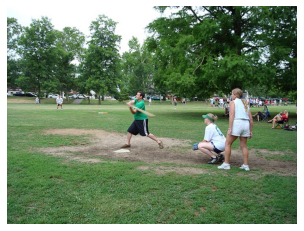

Personality: Cruel

Ground Truth: That swing looks juvenile

Sequence: it looks like they're having a good time.

Sequence: .................. 


In [48]:
difference(0)

In [12]:
with open('../datasets/personality_captions/train.json') as f:
    gt = json.load(f)

In [6]:
with open('../datasets/personality_captions/personalities.json') as f:
    p = json.load(f)

In [8]:
positive = 0
neutral = 0
negative = 0 
for x in gt:
    if x['personality'] in p['positive']:
        positive += 1
    elif x['personality'] in p['negative']:
        negative += 1
    elif x['personality'] in p['neutral']:
        neutral += 1

print(positive, negative, neutral)

58056 65872 25063


In [10]:
positive/ (positive+neutral+negative)
negative/ (positive+neutral+negative)

0.4421206650066111